In [4]:
from plumber import Stream, Pipe, PipeLine

In [7]:
class TestStream(Stream):
    def __init__(self, label: str) -> None:
        super().__init__(label)
        
        self.data[label] = "hi"

class TestPipe(Pipe):
    def __init__(self, label: str) -> None:
        super().__init__(label)

    def pipe(self, inputs):
        return str(inputs.keys())

input_stream = TestStream('input_stream')

pipe1 = TestPipe('pipe1')
pipe2 = TestPipe('pipe2')
pipe3 = TestPipe('pipe3')
pipe4 = TestPipe('pipe4')


PL = PipeLine()

PL.register(input_stream, pipe1)
PL.register(input_stream, pipe3)

PL.register(pipe1, pipe2)
PL.register(pipe3, pipe2)
PL.register(pipe2, pipe4)
PL.flow(input_stream)

input_stream: hi
pipe1: dict_keys([input_stream])
pipe3: dict_keys([input_stream])
pipe2: dict_keys([pipe1, pipe3])
pipe4: dict_keys([pipe2])


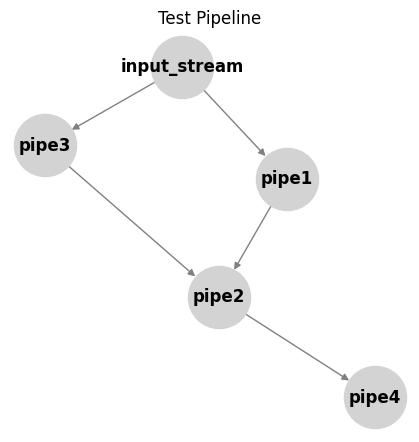

In [8]:
PL.plot(title="Test Pipeline")